In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Importing the Data File

In [ ]:
df = pd.read_csv('Airplane_Accident_train.csv', index_col = 'Accident_ID')

**Converting string outputs into numbers**

In [ ]:
dic = {'Highly_Fatal_And_Damaging':1, 'Minor_Damage_And_Injuries':2, 'Significant_Damage_And_Fatalities':3, 'Significant_Damage_And_Serious_Injuries':4}
df['Severity'] = df['Severity'].map(dic)

In [ ]:
df.head()

,Severity,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,2,49.223744,14,22,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,2,62.465753,10,27,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,3,63.059361,13,16,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,4,48.082192,11,9,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,3,26.484018,13,25,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


Data PreProcessing Steps

In [ ]:
df.dtypes

Severity                     int64
Safety_Score               float64
Days_Since_Inspection        int64
Total_Safety_Complaints      int64
Control_Metric             float64
Turbulence_In_gforces      float64
Cabin_Temperature          float64
Accident_Type_Code           int64
Max_Elevation              float64
Violations                   int64
Adverse_Weather_Metric     float64
dtype: object

Checking Null Values in all columns

In [ ]:
df.isnull().sum()

Severity                   0
Safety_Score               0
Days_Since_Inspection      0
Total_Safety_Complaints    0
Control_Metric             0
Turbulence_In_gforces      0
Cabin_Temperature          0
Accident_Type_Code         0
Max_Elevation              0
Violations                 0
Adverse_Weather_Metric     0
dtype: int64

Detecting and removing Outliers

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
x.shape

(10000, 10)

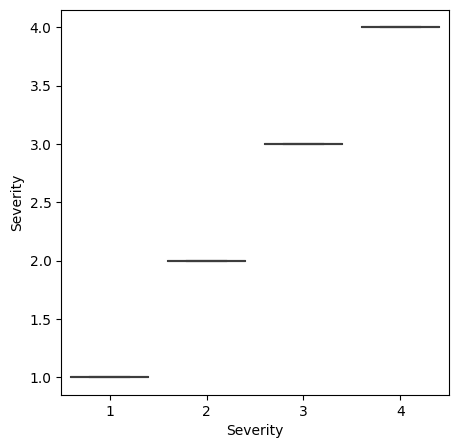

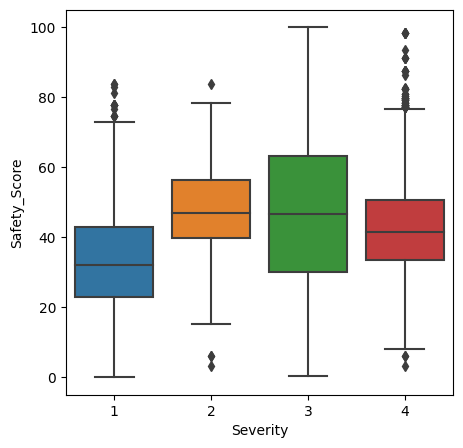

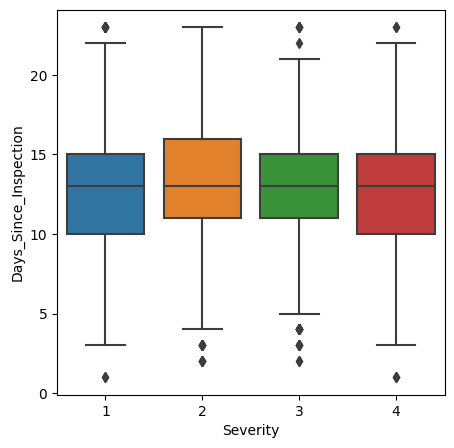

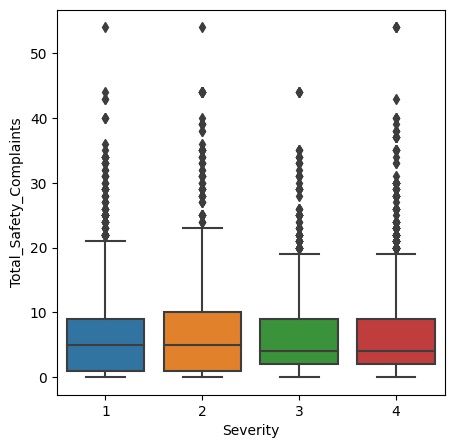

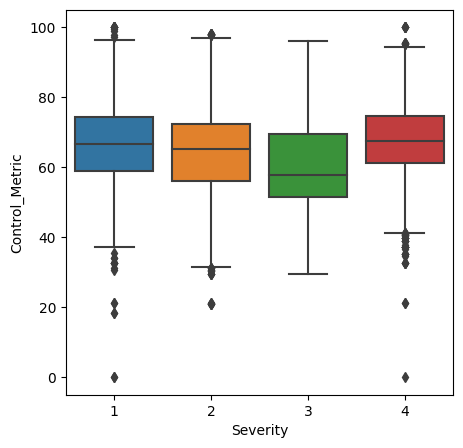

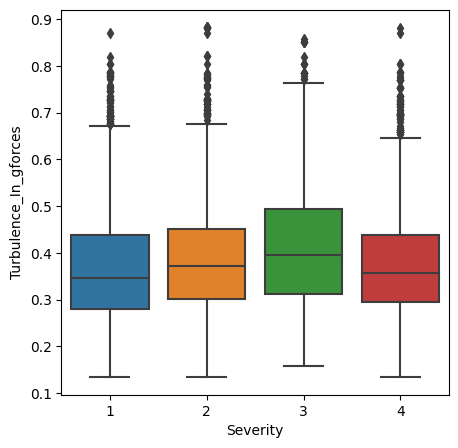

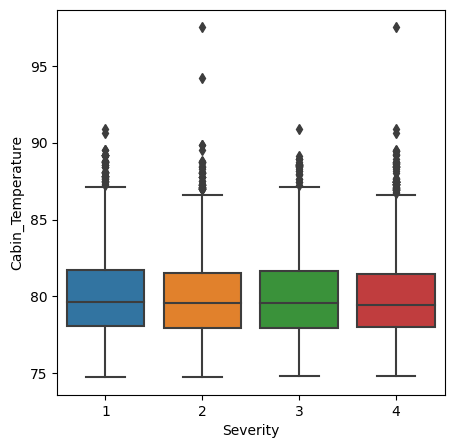

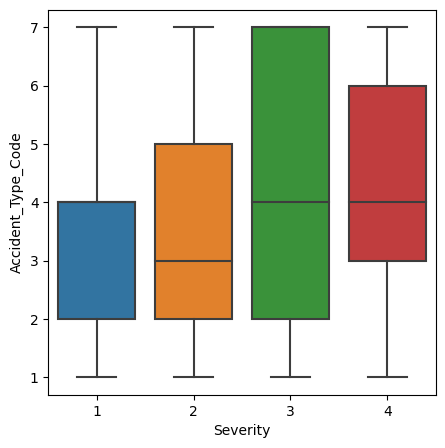

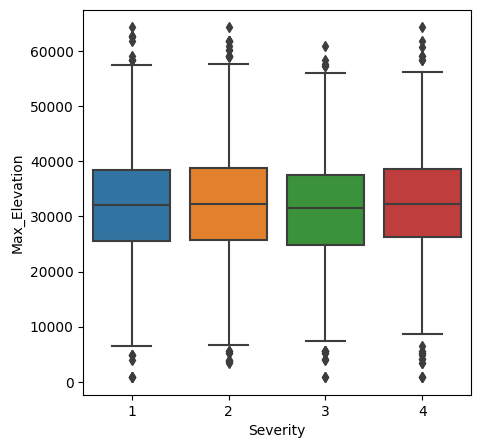

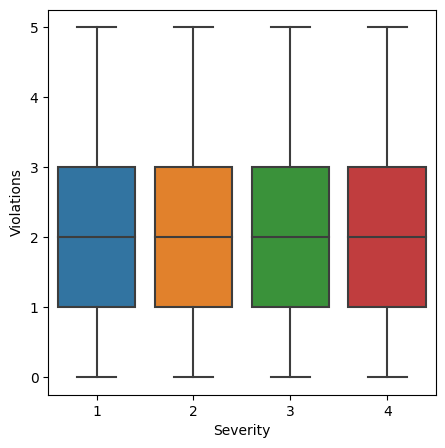

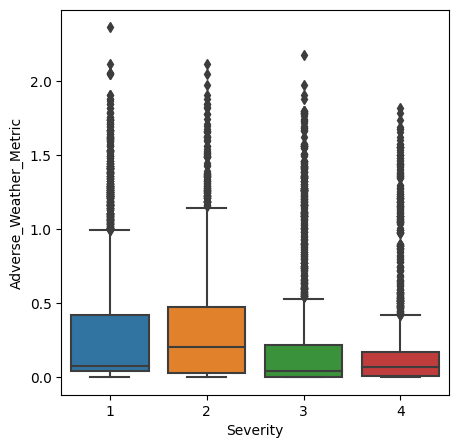

In [ ]:
for col in df:
  plt.figure(figsize = (5,5))
  sns.boxplot(data = df, x='Severity', y = col)
  plt.show()

In [ ]:
from scipy.stats import zscore
z = np.abs(zscore(x))
df = df[(z<=3).all(axis = 1)]
z

,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,
7570,0.455303,0.301981,2.214072,0.516733,0.901749,0.699134,0.953964,0.070649,0.949873,0.442701
12128,1.275888,0.828082,2.931264,0.601122,0.349922,1.656279,0.953964,0.633736,0.011732,0.253773
2181,1.312673,0.019465,1.353442,0.102462,0.485516,0.401990,1.674181,0.770528,0.949873,0.661939
5946,0.384562,0.545566,0.349373,0.804422,0.366593,0.659758,0.428335,1.141883,0.973336,0.115208
9054,0.953841,0.019465,2.644388,1.447221,1.316177,1.018021,0.428335,0.371883,0.011732,0.206638
...,...,...,...,...,...,...,...,...,...,...
11493,0.882573,1.393113,0.798134,0.143033,0.831563,0.481711,0.622923,0.692949,0.011732,0.602151
305,0.093641,0.828082,0.062496,0.250436,0.332084,0.072232,0.097294,0.937824,0.011732,0.474238
612,0.868953,1.149528,0.798134,0.374807,0.521193,0.145191,0.428335,0.187689,0.949873,0.229493


Feature Selection: Checking the correlation matrix to identify important features


<Axes: >

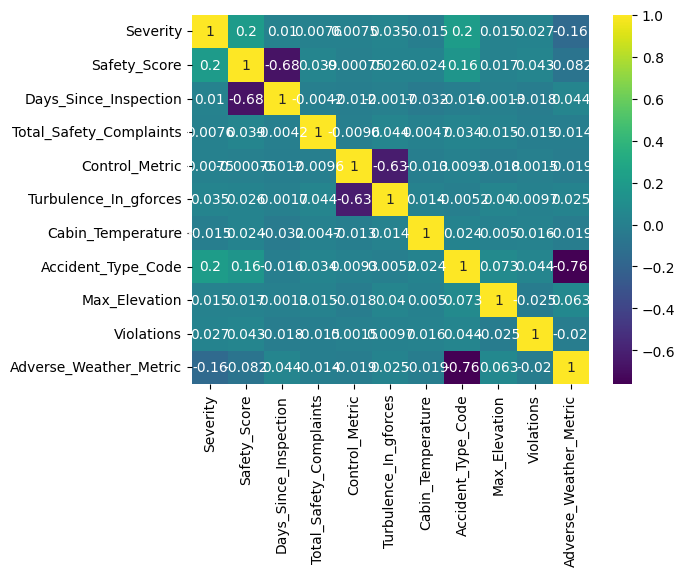

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')

In [ ]:
#Safety Score and Accident Type Code are strongly correlated with the target variable severity
#We do not change the skewness here

In [ ]:
df.skew()

Severity                   0.154172
Safety_Score               0.157770
Days_Since_Inspection     -0.030024
Total_Safety_Complaints    1.206046
Control_Metric            -0.070758
Turbulence_In_gforces      0.619439
Cabin_Temperature          0.666988
Accident_Type_Code         0.253043
Max_Elevation             -0.027664
Violations                 0.091159
Adverse_Weather_Metric     1.927383
dtype: float64

In [ ]:
#Total_Safety_Complaints, Adverse Weather Metric, Cabin Temp and Turbulence need to be adjusted for their skewness as they
#have high skewness and they are least correlated with the target variable

df['Total_Safety_Complaints'] = np.sqrt(df['Total_Safety_Complaints'])
df['Adverse_Weather_Metric'] = np.sqrt(df['Adverse_Weather_Metric'])
df['Cabin_Temperature'] = np.sqrt(df['Cabin_Temperature'])
df['Turbulence_In_gforces'] = np.sqrt(df['Turbulence_In_gforces'])


In [ ]:
df.skew()

Severity                   0.154172
Safety_Score               0.157770
Days_Since_Inspection     -0.030024
Total_Safety_Complaints    0.092563
Control_Metric            -0.070758
Turbulence_In_gforces      0.258151
Cabin_Temperature          0.625902
Accident_Type_Code         0.253043
Max_Elevation             -0.027664
Violations                 0.091159
Adverse_Weather_Metric     0.976290
dtype: float64

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
x.shape

(9323, 10)

In [ ]:
x.columns

Index(['Safety_Score', 'Days_Since_Inspection', 'Total_Safety_Complaints',
       'Control_Metric', 'Turbulence_In_gforces', 'Cabin_Temperature',
       'Accident_Type_Code', 'Max_Elevation', 'Violations',
       'Adverse_Weather_Metric'],
      dtype='object')

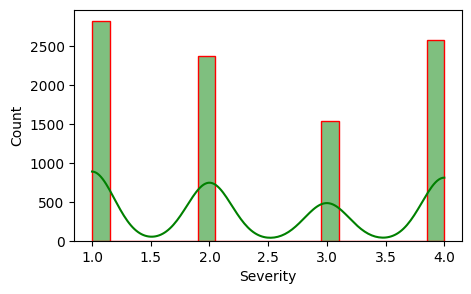

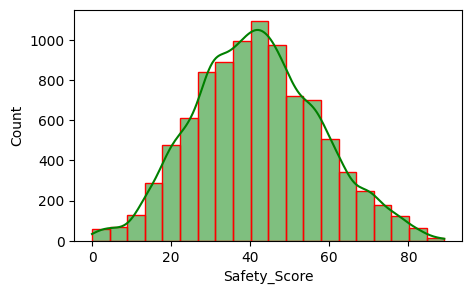

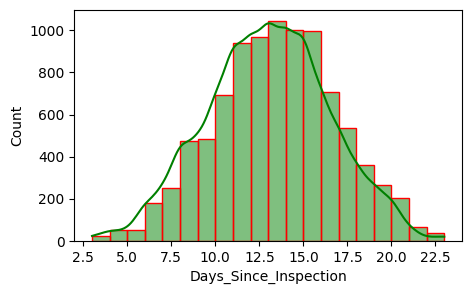

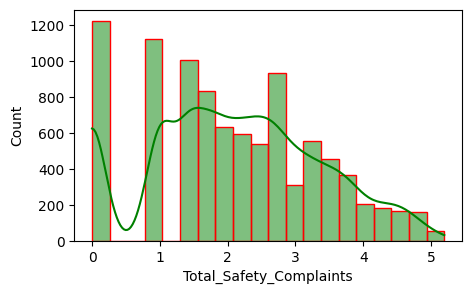

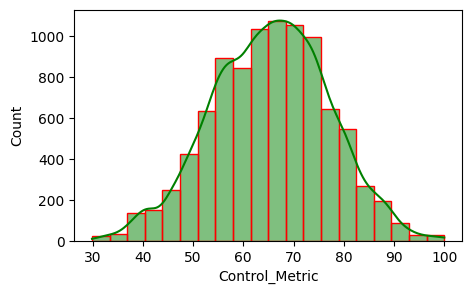

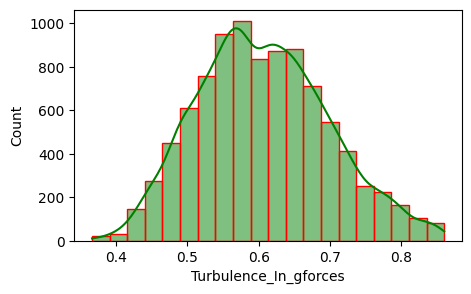

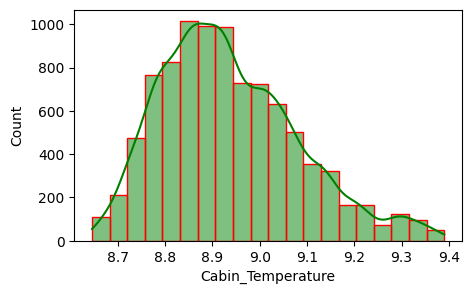

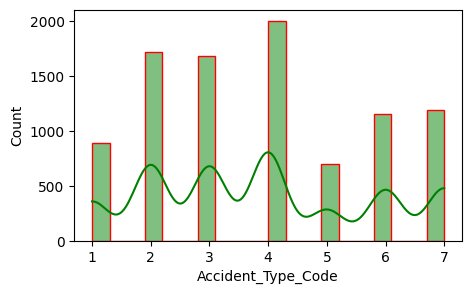

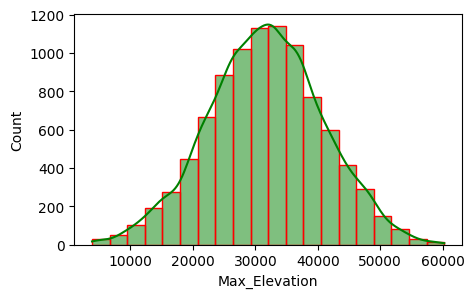

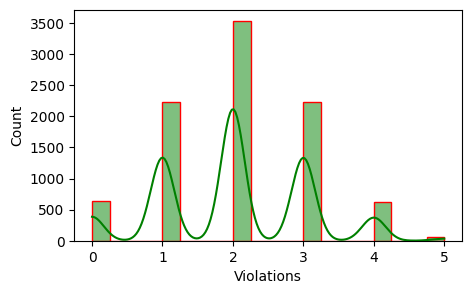

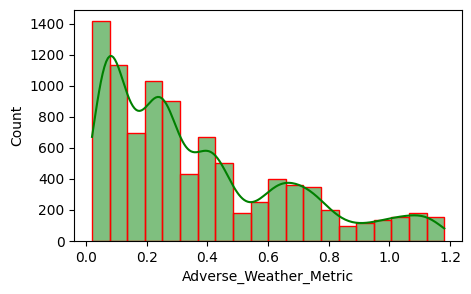

In [ ]:
#Before we proceed, it is better to check the distribution of our data
#We see the kind of values they range from:

for col in df:
  plt.figure(figsize = (5,3))
  sns.histplot(df[col], bins = 20, kde = True, color = 'green', edgecolor = 'red')
  plt.show()

In [ ]:
#dataloss when we removed the outliers using z-score is
dataloss = ((10000 - 9323)/10000)*100
print(f"DataLoss = {dataloss}%")

DataLoss = 6.77%


In [ ]:
#One Final step before proceeding to run different ML Models
#is to check the imbalance in data if any
df['Severity'].value_counts()

1    2829
4    2580
2    2374
3    1540
Name: Severity, dtype: int64

Splitting the Data into train and test componenets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
#Since the skewness has reduced, we can proceed to scale the extremely large values:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_fit = sc.fit_transform(x_train)

In [ ]:
x_test_transform = sc.transform(x_test)

In [ ]:
pred1 = df[df['Severity']==1]
pred2 = df[df['Severity']==2]
pred3 = df[df['Severity']==3]
pred4 = df[df['Severity']==4]

Text(0.5, 0, 'Control_Metric')

<Figure size 1000x500 with 0 Axes>

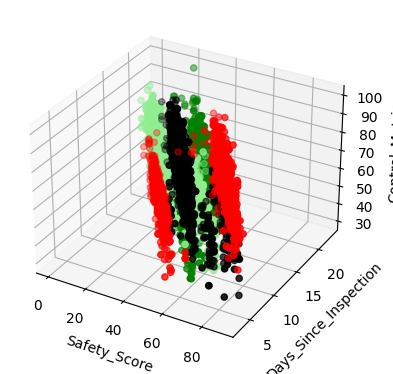

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.figure(figsize = (10,5))
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(221, projection='3d')

x1 =[pred1['Safety_Score']]
y1 =[pred1['Days_Since_Inspection']]
z1 =[pred1['Control_Metric']]

x2 =[pred2['Safety_Score']]
y2 =[pred2['Days_Since_Inspection']]
z2 =[pred2['Control_Metric']]

x3 =[pred3['Safety_Score']]
y3 =[pred3['Days_Since_Inspection']]
z3 =[pred3['Control_Metric']]

x4 =[pred4['Safety_Score']]
y4 =[pred4['Days_Since_Inspection']]
z4 =[pred4['Control_Metric']]


ax.scatter(x1, y1, z1, c='lightgreen')
ax.scatter(x2, y2, z2, c='green')
ax.scatter(x3, y3, z3, c='red')
ax.scatter(x4, y4, z4, c='black')

ax.set_xlabel('Safety_Score')
ax.set_ylabel('Days_Since_Inspection')
ax.set_zlabel('Control_Metric')

We Now Import all the models

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

1. Comparing the default hyperparameters using Cross Validation

In [ ]:
models = [LogisticRegression(max_iter=1000), RandomForestClassifier(random_state=0),GradientBoostingClassifier(random_state = 0)]

In [ ]:
def compare_models_cross_validation():

  for model in models:

    cv_score = cross_val_score(model, x, y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [ ]:
compare_models_cross_validation()

Cross Validation accuracies for the LogisticRegression(max_iter=1000) = [0.51903485 0.5152815  0.51045576 0.527897   0.52414163]
Acccuracy score of the  LogisticRegression(max_iter=1000) = 51.94 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestClassifier(random_state=0) = [0.91849866 0.92386059 0.92010724 0.93186695 0.92328326]
Acccuracy score of the  RandomForestClassifier(random_state=0) = 92.35 %
---------------------------------------------------------------
Cross Validation accuracies for the GradientBoostingClassifier(random_state=0) = [0.87613941 0.87131367 0.86273458 0.87875536 0.86051502]
Acccuracy score of the  GradientBoostingClassifier(random_state=0) = 86.99 %
---------------------------------------------------------------


2. Using GridSearch CV with differet hyperparameters for the best accuracy model from above

In [ ]:
model = RandomForestClassifier(random_state=0)
params = {'n_estimators': [10,20,50,100]}
classifier = GridSearchCV(model, params, cv=5)
classifier.fit(x_train_fit,y_train)
classifier.best_params_


{'n_estimators': 100}

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(x_train_fit,y_train)
y_pred = rfc.predict(x_test_transform)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95       690
           2       0.88      0.93      0.90       598
           3       0.93      0.93      0.93       384
           4       0.94      0.92      0.93       659

    accuracy                           0.93      2331
   macro avg       0.93      0.93      0.93      2331
weighted avg       0.93      0.93      0.93      2331

